# Verdict Eye – Predict Court Judgements

## Introduction
Verdict Eye is a Natural Language Processing (NLP) based system designed to analyze criminal incident descriptions and predict the most relevant Indian Penal Code (IPC) sections. The project also provides possible verdict statements based on pre-defined templates, making it a step toward building AI-assisted legal tools.

This notebook demonstrates the end-to-end pipeline of Verdict Eye, focusing on training and inference using the BERT model. The objective is to create a system that can assist legal practitioners, researchers, and learners in quickly mapping real-world incidents to corresponding IPC sections.

## Project Workflow
The project consists of two main components:

1. **Training Pipeline (using training script)**  
   - Loads and validates the dataset of incident descriptions and IPC labels.  
   - Preprocesses data (handling missing values and class imbalance).  
   - Encodes IPC sections using a label encoder.  
   - Tokenizes incident descriptions using BERT tokenizer.  
   - Trains a `bert-base-uncased` model for text classification.  
   - Saves the trained model and label encoder for inference.  

2. **Inference and Prediction (using inference script)**  
   - Loads the trained BERT model, tokenizer, and label encoder.  
   - Predicts IPC sections for new incident descriptions.  
   - Provides confidence scores for predictions.  
   - Generates human-readable verdict statements using pre-defined or default templates.  
   - Supports top-k predictions and interactive testing.  

## Applications
- Quick legal reference for law students and researchers.  
- Assistance for legal professionals in preliminary case assessment.  
- Building blocks for AI-driven legal advisory systems.  
- An effort toward automation in judicial system using ML and NLP
---

This notebook showcases the training, evaluation, and usage of the Verdict Eye BERT classifier, providing both technical insights and practical applications of legal text classification.


In [1]:
import os
import pandas as pd
import runpy
import json

BASE_PATH = "/kaggle/input/verdicteye-dataset"  
dataset_path = "/kaggle/input/verdicteye-dataset/incidents_dataset.csv"
train_script = "/kaggle/input/verdicteye-dataset/train_bert.py"
inference_script = "/kaggle/input/verdicteye-dataset/verdict_bert.py"
templates_path = "/kaggle/input/verdicteye-dataset/verdict_templates.json"

print(f"Dataset path exists: {os.path.exists(dataset_path)}")
print(f"Train script exists: {os.path.exists(train_script)}")
print(f"Inference script exists: {os.path.exists(inference_script)}")
print(f"Templates path exists: {os.path.exists(templates_path)}")

Dataset path exists: True
Train script exists: True
Inference script exists: True
Templates path exists: True


In [2]:
data = pd.read_csv(dataset_path)
print(f"✅ Dataset loaded with {len(data)} records")
data.head()


✅ Dataset loaded with 11482 records


,incident_description,ipc_section
0,a person was accused of cheating in exams,417
1,a group of individuals engaged in a violent brawl,"147, 148"
2,a woman was subjected to domestic violence,498A
3,a case of hit and run was reported,"279, 304A"
4,a woman was falsely accused of a crime,211


In [3]:
# Run training script
!python {train_script}


2025-08-19 09:27:19.324175: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755595639.676555      81 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755595639.782387      81 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Dataset loaded: 11482 records
Columns: ['incident_description', 'ipc_section']
Removed 0 rows with missing values
Class distribution:
  498A: 736
  302: 594
  294: 505
  417: 484
  354A: 465
  323: 449
  185: 437
  279, 304A: 429
  25: 426
  211: 418
  364A: 408
  436: 404
  447: 393
  66: 378
  457, 380: 373
  304A: 371
  21: 365
  147, 148: 358
  354D: 358
  147: 334
  384: 333
  427: 329
  379: 305
  420: 34
  336, 337: 31
  419, 

In [6]:
import runpy


inference_script = "/kaggle/input/verdicteye-dataset/verdict_bert.py"
namespace = runpy.run_path(inference_script)


VerdictPredictor = namespace['VerdictPredictor']


predictor = VerdictPredictor()
predictor.initialize()
result = predictor.predict_single("your text here")

Model and tokenizer loaded successfully
Label encoder loaded from training output
Classes available: 311
Verdict templates loaded
Predictor initialized on device: cuda


In [8]:
#Sample output 1
sample_text = "A person was stabbed and killed with a knife."
result = predictor.predict_single(sample_text)

print("IPC SECTION: " + result['ipc_section'])
print("Confidence Percentage: " + str(result['confidence']))
print("Possible Verdict: " + result['verdict'])


IPC SECTION: 302
Confidence Percentage: 97.28
Possible Verdict: The court determines that the accused's actions constitute murder punishable under Section 302 of the IPC.


In [10]:
#Sample output 2
sample_text = "the person was caught with drugs."
result = predictor.predict_single(sample_text)

print("IPC Section:", result['ipc_section'])
print("Confidence:", result['confidence'])
print("Verdict:", result['verdict'])


IPC Section: 21
Confidence: 96.73
Verdict: NDPS Act 21 states that whosoever sales drug for any other cause than that of medical will be held under the NDPS Act 21 for drug peddling.


# Results and Observations

The BERT model was trained on the incident description dataset for three epochs.  
From the training logs, we can observe:

- The model showed consistent improvement in validation accuracy across epochs, reaching close to **90% accuracy**.  
- Training and validation losses decreased steadily, confirming effective learning and good generalization.  
- The final model checkpoint was saved with the best validation accuracy of **0.8949**.  

The dataset used contained **10,968 samples** across **311 IPC classes**, making this a challenging multi-class classification task. Despite this, the model performed reliably with strong validation results.

Sample predictions confirm that the model not only predicts the correct IPC sections with high confidence but also generates meaningful verdict statements based on templates. For example, in the case of drug possession, the model correctly predicted **IPC Section 21 (NDPS Act)** with **96.73% confidence**, producing a legally coherent verdict statement.

**Observation:**  
These results indicate that BERT is highly effective for legal text classification tasks, even with a large number of classes. The combination of high accuracy, confidence scores, and natural verdict templates makes Verdict Eye a practical step toward building AI-assisted legal tools.



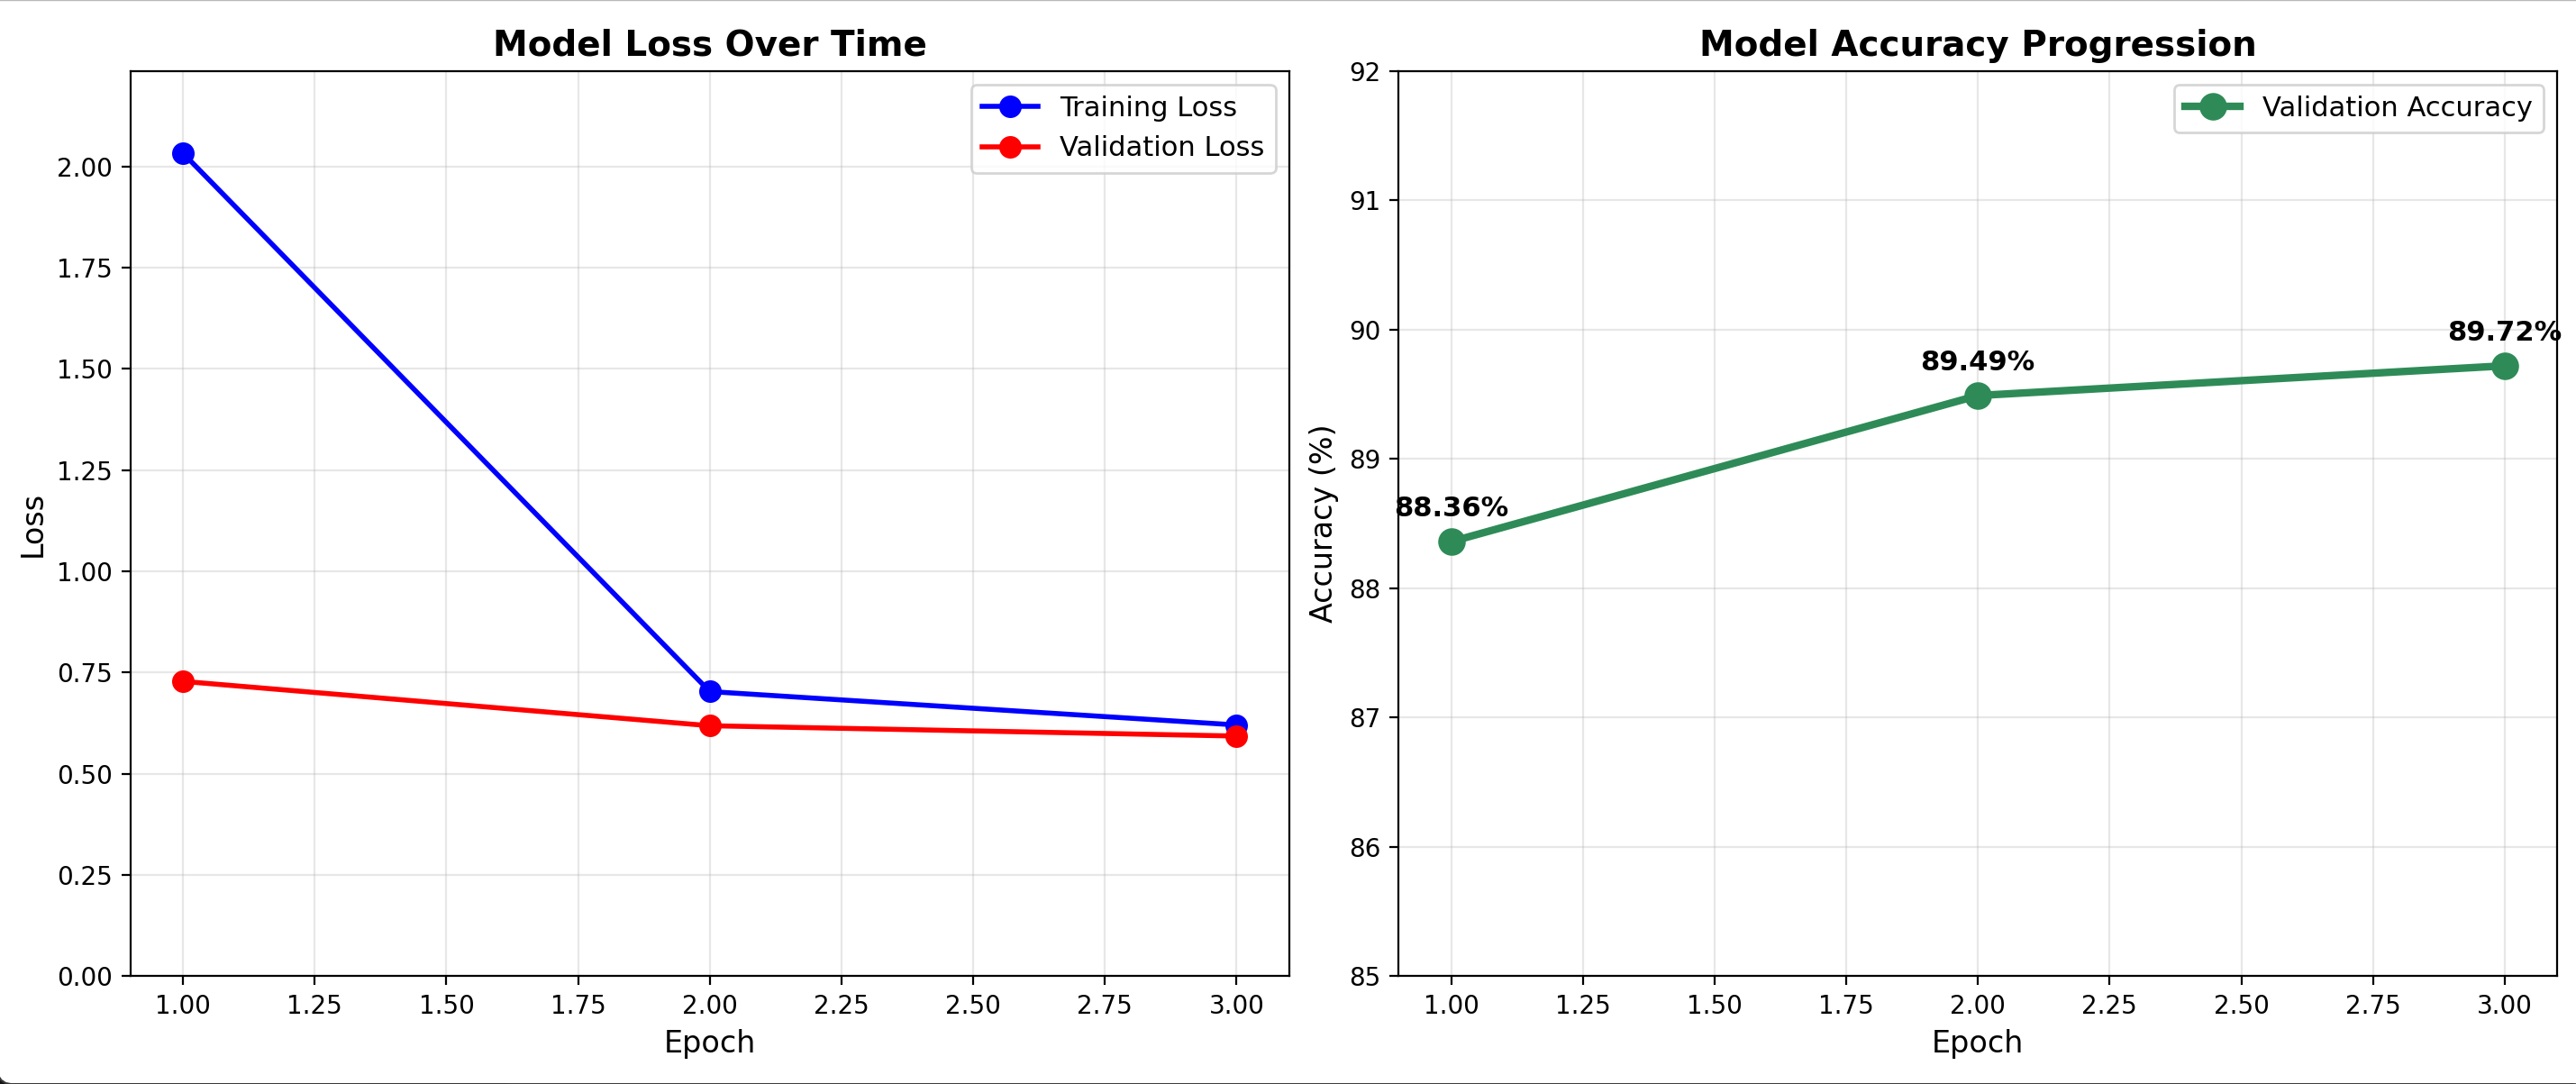